In [1]:
import pandas as pd
data=pd.read_csv('titanic-passengers.csv',delimiter=';')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [2]:
data=data.drop("Cabin",axis=1)
data=data.drop("Ticket",axis=1)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,13.0000,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,7.6500,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,7.8542,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,52.0000,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,7.9250,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,14.5000,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,15.7417,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,7.2500,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,26.0000,S


In [3]:
import math
data['Age'].fillna(round(data['Age'].mean()),inplace=True)
data['Embarked'].fillna('S',inplace=True)
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Sex']=encoder.fit_transform(data['Sex'])
data['Survived']=encoder.fit_transform(data['Survived'])
data['Embarked']=encoder.fit_transform(data['Embarked'])
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,2
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,2
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,2
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,2
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,2
5,105,0,3,"Gustafsson, Mr. Anders Vilhelm",1,37.0,2,0,7.9250,2
6,576,0,3,"Patchett, Mr. George",1,19.0,0,0,14.5000,2
7,382,1,3,"Nakid, Miss. Maria (""Mary"")",0,1.0,0,2,15.7417,0
8,228,0,3,"Lovell, Mr. John Hall (""Henry"")",1,20.5,0,0,7.2500,2
9,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",0,42.0,1,0,26.0000,2


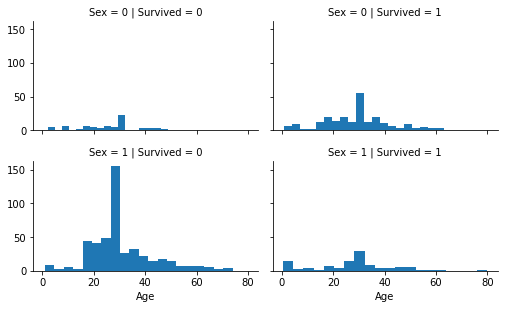

In [5]:
import seaborn as sns
import  matplotlib.pyplot as plt
g=sns.FacetGrid(data,row='Sex',col='Survived',height=2.2,aspect=1.6)
g.map(plt.hist,'Age',bins=20)
g.add_legend()

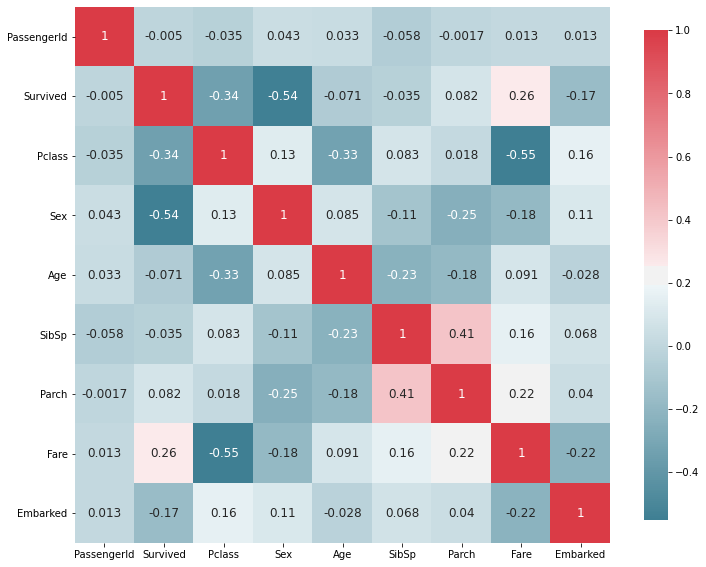

In [6]:
def plot_correlation_map( data ):

    corr = data.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map( data )
#This function is a manual execution of the correlation groupby operation showing the impact of each feature on one another.

In [7]:
data[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [8]:
data['Title']=data['Name'].str.split(pat=',').str.get(1).str.split(pat='.').str.get(0)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,2,Mr
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,2,Mr
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,2,Mr
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,2,Mrs
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,2,Mr


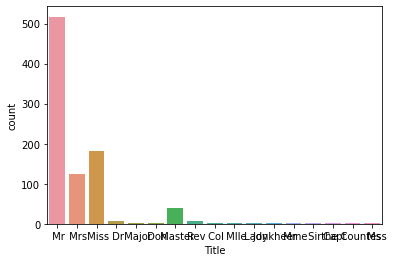

In [9]:
sns.countplot(x="Title",data=data)

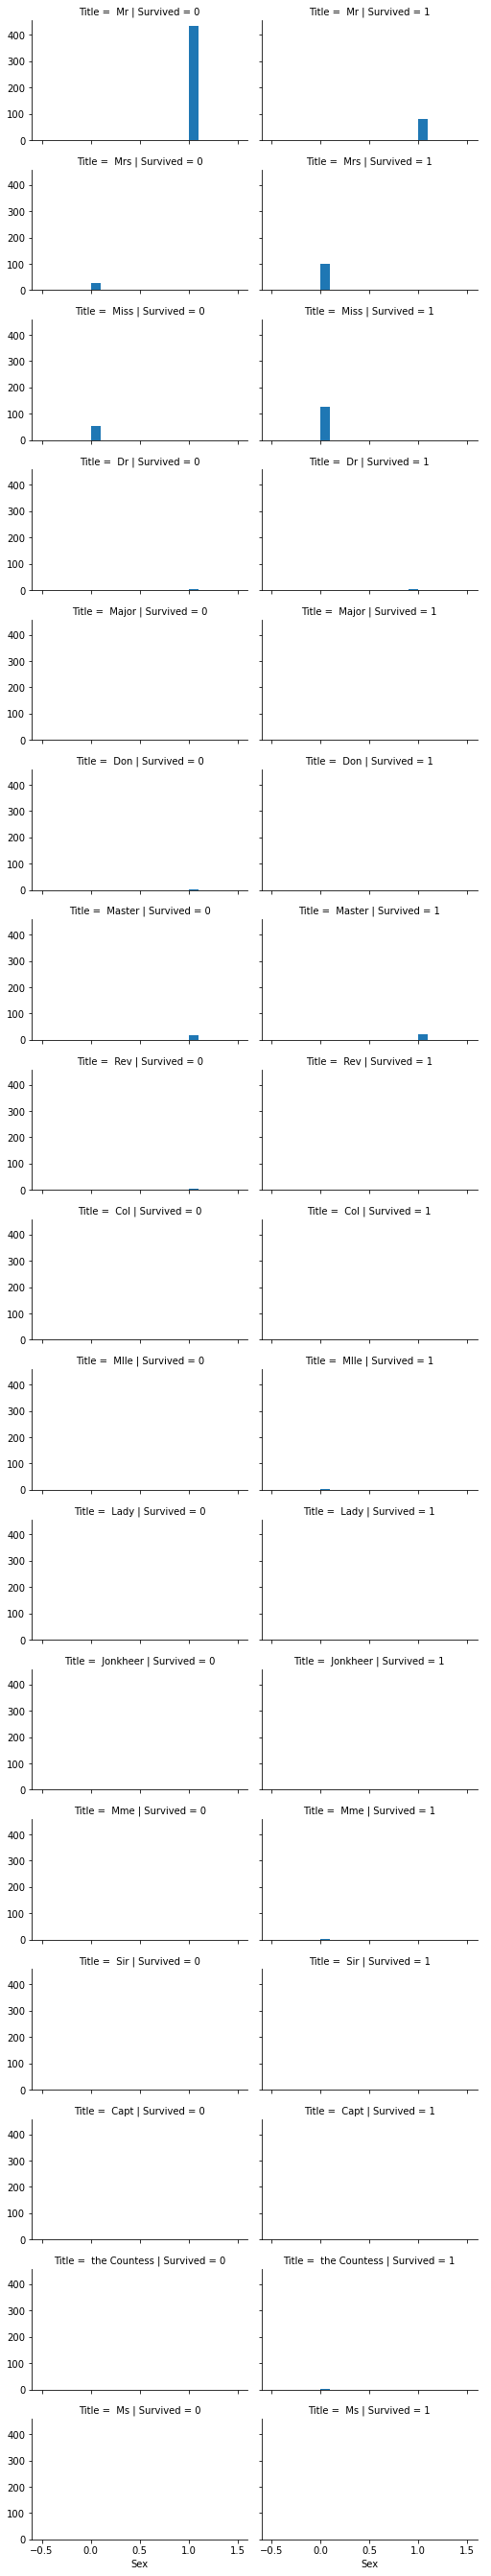

In [10]:
g=sns.FacetGrid(data,row='Title',col='Survived',height=2.2,aspect=1.6)
g.map(plt.hist,'Sex')
g.add_legend()

In [11]:
Title_Dictionary = {

           "Title" : { "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }
}
data.replace(Title_Dictionary, inplace=True, regex=True)
data.tail(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
871,812,0,3,"Lester, Mr. James",1,39.0,0,0,24.1500,2,Mrs
872,786,0,3,"Harmer, Mr. Abraham (David Lishin)",1,25.0,0,0,7.2500,2,Mrs
873,43,0,3,"Kraeff, Mr. Theodor",1,30.0,0,0,7.8958,0,Mrs
874,60,0,3,"Goodwin, Master. William Frederick",1,11.0,5,2,46.9000,2,Master
875,463,0,1,"Gee, Mr. Arthur H",1,47.0,0,0,38.5000,2,Mrs
876,375,0,3,"Palsson, Miss. Stina Viola",0,3.0,3,1,21.0750,2,Miss
877,271,0,1,"Cairns, Mr. Alexander",1,30.0,0,0,31.0000,2,Mrs
878,787,1,3,"Sjoblom, Miss. Anna Sofia",0,18.0,0,0,7.4958,2,Miss
879,275,1,3,"Healy, Miss. Hanora ""Nora""",0,30.0,0,0,7.7500,1,Miss
880,360,1,3,"Mockler, Miss. Helen Mary ""Ellie""",0,30.0,0,0,7.8792,1,Miss


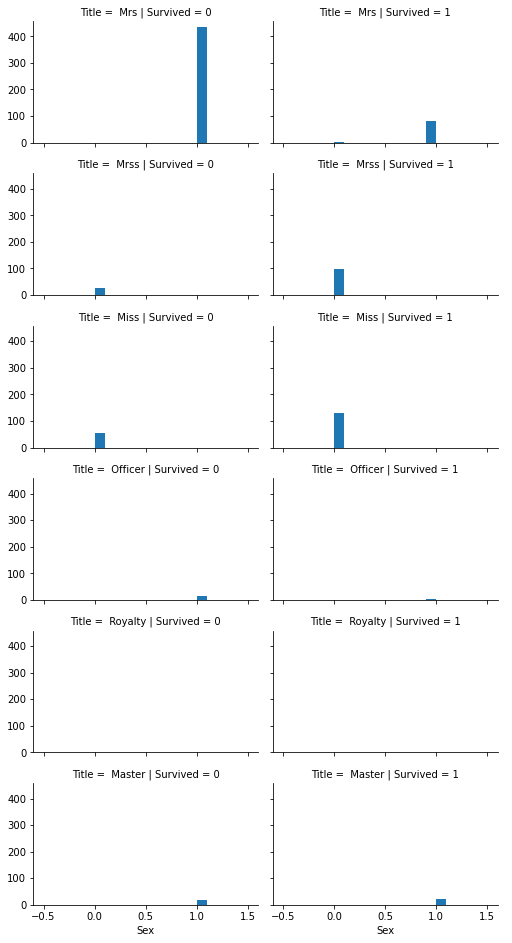

In [12]:
g=sns.FacetGrid(data,row='Title',col='Survived',height=2.2,aspect=1.6)
g.map(plt.hist,'Sex')
g.add_legend()

In [13]:
data["FamilySize"]=data["Parch"]+data["SibSp"]
data.head(20)
#this feature isn't really useful in the current data set since it doesn't have any impact on whether someone surivved an accident or not

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,2,Mrs,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,2,Mrs,0
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,2,Mrs,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,2,Mrss,4
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,2,Mrs,1
5,105,0,3,"Gustafsson, Mr. Anders Vilhelm",1,37.0,2,0,7.9250,2,Mrs,2
6,576,0,3,"Patchett, Mr. George",1,19.0,0,0,14.5000,2,Mrs,0
7,382,1,3,"Nakid, Miss. Maria (""Mary"")",0,1.0,0,2,15.7417,0,Miss,2
8,228,0,3,"Lovell, Mr. John Hall (""Henry"")",1,20.5,0,0,7.2500,2,Mrs,0
9,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",0,42.0,1,0,26.0000,2,Mrss,1


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


x=data[["Sex", "Age", "Embarked"]]
y=data["Survived"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) 

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)   

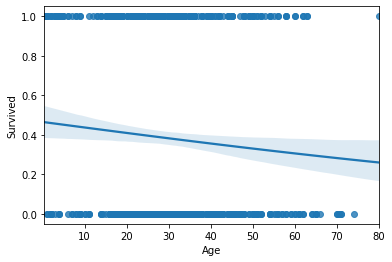

In [16]:
sns.regplot(x='Age',y='Survived',data=data,logistic=True)

In [18]:
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
print(confusion_matrix)

Predicted    0   1
Actual            
0          156  33
1           38  85


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       189
           1       0.72      0.69      0.71       123

    accuracy                           0.77       312
   macro avg       0.76      0.76      0.76       312
weighted avg       0.77      0.77      0.77       312

